**Задача №6.** *Последовательный критерий отношения правдоподобия*

В условиях задачи №5
1. Постройте последовательный критерий Вальда для проверки гипотезы $H_0: a=a_0$  против альтернативы $H_1:a=a_1$ при известном $\sigma=\sigma_1$. Ошибка первого рода задана в условии, ошибка второго рода $\beta$ вычислена вами в пункте 4.
2. Примените построенный критерий к данной выборке (порядок чтения-по столбцам), сформулируйте результат. Дайте графическую иллюстрацию последовательного критерия.
3. Вычислите математическое ожидание момента принятия решения при основной гипотезе $H_0$ и при альтернативе $H_1$.
4. Перепишите критическое множество из пункта 3 в виде $\Bigl(\frac{L(\overrightarrow{Х_n}, a_1)}{L(\overrightarrow{Х_n}, a_0)} > C\Bigr)$ и сравните результаты применения критериев Вальда и Неймана-Пирсона.


Вариант 8

Дано:

$\alpha=0.05$, $a_0=-2$, $H_2: a<a_0$, $\sigma_0=1.7$, $H_3: \sigma>\sigma_0$, $H_1:a=a_1=-2.5$, $\sigma_1=1.75$, $\varepsilon=0.1$, $n=80$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, log2, trunc, log
import scipy.stats as stats

In [2]:
alpha = 0.05
beta = 0.181
a0 = -2
sigma0 = 1.7
a1 = -2.5
sigma1 = 1.75
epsilon = 0.1
n = 80

Импортирую выборку и провожу первоначальную предобработку данных

In [3]:
X = np.array(pd.read_csv('var8.csv', sep='\t', header=None))
pd.DataFrame(data=X)

,0,1,2,3,4,5,6,7,8,9
0,-7.934,-4.058,-2.114,-3.192,-0.833,-4.188,-1.501,-3.423,-4.898,-4.386
1,1.593,-4.623,-6.764,-2.357,-2.036,-4.244,-2.723,-5.344,-1.090,-2.410
2,-0.421,0.569,-2.322,-2.671,-0.537,-1.112,2.407,-1.990,-3.624,-0.709
3,-3.069,-1.672,-6.772,-3.571,-2.100,-0.728,-2.568,-1.321,-2.690,-1.317
4,-2.048,-1.370,-2.172,-4.354,-2.840,-2.423,-1.277,-4.225,-2.537,-1.557
5,-4.385,-4.432,-1.593,-2.833,0.800,-4.341,-0.841,-4.071,-0.872,-4.323
6,-1.386,-3.551,-1.647,-1.441,-4.588,-0.749,-2.423,-2.835,0.449,-2.276
7,-2.628,-0.658,-2.699,1.314,-1.347,-4.041,-0.714,-2.496,-5.954,-2.171


Преобразую матрицу к массиву, режим чтения матрицы - столбцами

In [4]:
vec = X.reshape((80,), order='F')
pd.DataFrame(data=vec).T

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-7.934,1.593,-0.421,-3.069,-2.048,-4.385,-1.386,-2.628,-4.058,-4.623,...,0.449,-5.954,-4.386,-2.41,-0.709,-1.317,-1.557,-4.323,-2.276,-2.171


In [5]:
print('Выборочное среднее:', round(X.mean(), 3))
print('Выборочная дисперсия:', round(X.var(ddof=1), 3))

Выборочное среднее: -2.453
Выборочная дисперсия: 3.526


Построим последовательный критерий Вальда для проверки гипотезы $H_0:𝑎=𝑎_0$ против альтернативы $H_1:𝑎=𝑎_0$ при известном  $\sigma = \sigma_1$ . Ошибка первого рода: $\alpha = 0.05$, ошибка второго рода $\beta = 0.181$.

Построим последовательный критерий Вальда:

$$z(\overrightarrow{Х_n}) = \frac{L(\overrightarrow{Х_n}, a_1)}{L(\overrightarrow{Х_n}, a_0)} = \prod\limits_{k = 1}^n \frac{\frac{1}{\sqrt{2\pi}\sigma_1} e^{-\frac{(x_k-a_1)^2}{2\sigma_1^2}}}{\frac{1}{\sqrt{2\pi}\sigma_1} e^{-\frac{(x_k-a_0)^2}{2\sigma_1^2}}} = \prod\limits_{k = 1}^n e^{-\frac{(x_k-a_1)^2}{2\sigma_1^2} + \frac{(x_k-a_0)^2}{2\sigma_1^2}} = \prod\limits_{k = 1}^n e^{-\frac{1}{2\sigma_1^2}(-2 x_k (a_1-a_0) + a_1^2 - a_0^2)}$$

Условие выхода из критерия:
$$\nu = min\Bigl\{n; \frac{L(\overrightarrow{Х_n}, a_1)}{L(\overrightarrow{Х_n}, a_0)} \in (A; B)\Bigr\}$$

Если $z_{\nu}\geqslant A \Rightarrow H_1$ - склоняемся к альтернативной гипотезе, $z_{\nu}\leqslant B \Rightarrow H_0$ - склоняемся к основной гипотезе

Константы $A$ и $B$ находим из условий:
$$\alpha=P(z_\nu \geqslant A | H_0)$$
$$\beta=P(z_\nu \leqslant B | H_1)$$
Тогда
$$A = \frac{1-\beta}{\alpha},B = \frac{\beta}{1-\alpha}$$

In [6]:
def wald_test(vec, j, a1, a0, sigma1):
    wald = lambda x, a0, a1, sigma: np.exp(- (1/(2*sigma**2))*(-2*x*(a1-a0)+a1**2-a0**2))
    return np.prod(np.array([wald(vec[i], a0, a1, sigma1) for i in range(j)]))

A = (1 - beta) / alpha
B = beta / (1 - alpha)
print('A = {}\nB = {}'.format(round(A, 3), round(B, 3)))

A = 16.38
B = 0.191


Применим построенный критерий к данной выборке

In [7]:
xlist = np.linspace(1, 80, 80)
ylist = np.array([wald_test(vec, i, a1, a0, sigma1) for i in range(0, n)])

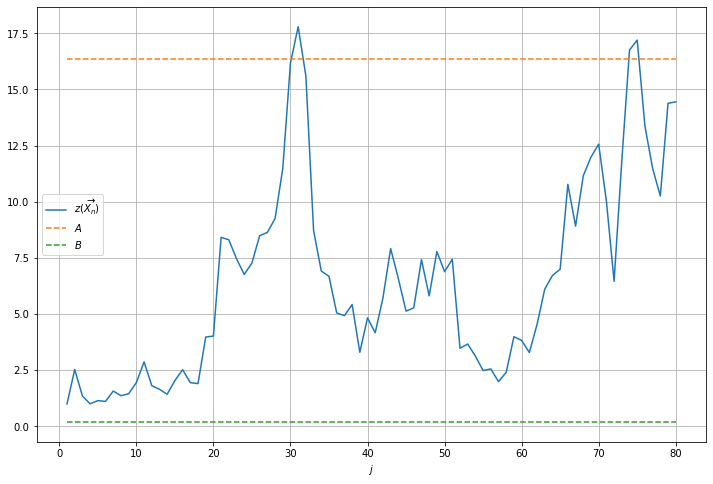

In [8]:
plt.figure(figsize=(12, 8))

plt.plot(xlist, ylist, label=r'$z(\overrightarrow{Х_n})$')
plt.plot(xlist, [A for i in xlist], linestyle='--', label=r'$A$')
plt.plot(xlist, [B for i in xlist], linestyle='--', label=r'$B$')

plt.xlabel(r'$j$')
plt.legend()
plt.grid()
plt.show()

Вывод: применение последовательного критерия Вальда к данной выборке дало график, наглядно иллюстрирующий и подтверждающий вывод **Задачи №5** о склонении к альтернативной гипотезе, так как на отрезке $j \in [30; 31]$ наблюдается первое пересечение с прямой $A=16.38$

Вычислите математическое ожидание момента принятия решения при основной гипотезе $H_0$ и при альтернативе $H_1$

Рассмотрим статистику для следующего набора: $(\nu, X_1, ... X_n)$
$$lnZ(\overrightarrow{X_Y})=\sum_{k = 1}^{\nu} Y_k$$
$$Y_k = ln \frac{P(X_k, \theta_1)}{P(X_k, \theta_0)}$$
$$M_{\theta_i} lnZ(\overrightarrow{X_{\nu}}) = M_{\theta_i \nu} M_{\theta_i Y_k}$$
$$M_{\theta_i \nu} = \frac{M_{\theta_i} lnZ(\overrightarrow{X_{\nu}})}{M_{\theta_i Y_k}}$$
 $-$ получили формулу для математического ожидания принятия решения

Определим формулы при принятии основной гипотезы и альтернативы
<table>
    <tr>
        <td>
            $ln Z(\overrightarrow{X_{j}})$
        </td>
        <td>
            $ln A$
        </td>
        <td>
            $ln B$
        </td>
    </tr>
    <tr>
        <td>
            $H_0$
        </td>
        <td>
            $\alpha$
        </td>
        <td>
            $1 - \alpha$
        </td>
    </tr>
    <tr>
        <td>
            $H_1$
        </td>
        <td>
            $1 - \beta$
        </td>
        <td>
            $\beta$
        </td>
    </tr>
</table>

Откуда
$$M_{\theta_0 \nu} = \frac{\alpha ln A + (1 - \alpha) ln B}{M_{\theta_0 Y_k}}$$
$$M_{\theta_1 \nu} = \frac{(1 - \beta) ln A + \beta ln B}{M_{\theta_1 Y_k}}$$

Осталось определить мат ожидания логарифма отношения правдоподобия при $a_0$ и $a_1$
$$Y_k = ln \frac{P(X_k, a_1)}{P(X_k, a_0)} = ln \frac{\frac{1}{\sqrt{2\pi}\sigma_1} e^{-\frac{(x_k-a_1)^2}{2\sigma_1^2}}}{\frac{1}{\sqrt{2\pi}\sigma_1} e^{-\frac{(x_k-a_0)^2}{2\sigma_1^2}}} = -\frac{(x_k-a_1)^2}{2\sigma_1^2} + \frac{(x_k-a_0)^2}{2\sigma_1^2} = \frac{x_k}{\sigma_1^2} (a_1- a_0) + \frac{a_0^2-a_1^2}{2\sigma_1^2}$$

Тогда
$$M_{\theta_0Y_k} = \frac{a_0}{\sigma_1^2} (a_1- a_0) + \frac{a_0^2-a_1^2}{2\sigma_1^2} = -\frac{(a_1-a_0)^2}{2\sigma_1^2}$$
$$M_{\theta_1Y_k} = \frac{a_1}{\sigma_1^2} (a_1- a_0) + \frac{a_0^2-a_1^2}{2\sigma_1^2} = \frac{(a_1-a_0)^2}{2\sigma_1^2}$$

In [9]:
MY0 = - ((a1-a0)**2) / (2*sigma1)
MY1 = ((a1-a0)**2) / (2*sigma1)
print('Математические ожидания логарифма отношения правдоподобия a0 и a1:\nM_0Y = {}\nM_1Y = {}'
      .format(round(MY0, 4), round(MY1, 4)))

Математические ожидания логарифма отношения правдоподобия a0 и a1:
M_0Y = -0.0714
M_1Y = 0.0714


In [10]:
Mnu0 = (alpha * log(A) + (1 - alpha) * log(B)) / MY0
Mnu1 = ((1 - beta) * log(A) + beta * log(B)) / MY1
print('Математическое ожидание момента принятия решения при основной гипотезе и при альтернативе\nM_0nu = {}\nM_1nu = {}'
      .format(round(Mnu0, 3), round(Mnu1, 3)))

Математическое ожидание момента принятия решения при основной гипотезе и при альтернативе
M_0nu = 20.094
M_1nu = 27.858


Запишу критическое множество из пункта 3 в виде $\Bigl(\frac{L(\overrightarrow{Х_n}, a_1)}{L(\overrightarrow{Х_n}, a_0)} > C\Bigr)$:

$$\frac{L(\overrightarrow{Х_n}, a_1)}{L(\overrightarrow{Х_n}, a_0)} = \prod\limits_{k = 1}^n \frac{\frac{1}{\sqrt{2\pi}\sigma_1} e^{-\frac{(x_k-a_1)^2}{2\sigma_1^2}}}{\frac{1}{\sqrt{2\pi}\sigma_1} e^{-\frac{(x_k-a_0)^2}{2\sigma_1^2}}} = \prod\limits_{k = 1}^n e^{-\frac{(x_k-a_1)^2}{2\sigma_1^2} + \frac{(x_k-a_0)^2}{2\sigma_1^2}} = \prod\limits_{k = 1}^n e^{-\frac{1}{2\sigma_1^2}(-2 x_k (a_1-a_0) + a_1^2 - a_0^2)} > C$$
$$ln \frac{L(\overrightarrow{Х_n}, a_1)}{L(\overrightarrow{Х_n}, a_0)} = \frac{\sum\limits_{k=1}^n x_k}{\sigma_1^2} (a_1- a_0) + n\frac{a_0^2-a_1^2}{2\sigma_1^2} > lnC$$

$$\sum\limits_{k=1}^n x_k < \frac{\sigma_1^2}{a_1-a_0} \Bigl(lnC + \frac{a_1^2-a_0^2}{2\sigma_1^2} \Bigr)$$

Запишем критическое множество S:
$$S = \Bigl\{ \sum\limits_{k=1}^n x_k < c_n \Bigr\}$$
Найдем $c_n$ зная заданный уровень доверия $\alpha=0.05$:
$$\alpha = P\Bigl( \sum\limits_{k=1}^n x_k < c_n | a=a_0 \Bigr) = P\Bigl( \frac{\sum\limits_{k=1}^n x_k - \sum\limits_{k=1}^n M}{\sum\limits_{k=1}^n D} < \frac{c_n - \sum\limits_{k=1}^n M}{\sqrt{\sum\limits_{k=1}^n D}} | a=a_0 \Bigr) = Ф\Bigl(\frac{c_n - n\cdot a_0}{\sqrt{n\cdot \sigma_1^2}}\Bigr) = 0.05$$

$$c_n = n\cdot a_0 + u_{0.05}\sigma_1\sqrt{n}$$

In [11]:
cn = n * a0 + stats.norm.ppf(0.05, 0, 1) * sigma1 * sqrt(n)
print('Cn =', round(cn, 3))
print('SumXk =', round(vec.sum(), 3))

Cn = -185.746
SumXk = -196.278


Отклоняем гипотезу $H_0$ так как $\sum\limits_{k=1}^n x_k = -196.278$ принадлежит критическому множеству $$S = \Bigl\{ \sum\limits_{k=1}^n x_k < -185.746 \Bigr\}$$

Наконец, найдем константу $C$ критерия Неймана-Пирсона:
$$\frac{\sigma_1^2}{a_1-a_0} \Bigl(lnC + n\frac{a_1^2-a_0^2}{2\sigma_1^2} \Bigr) = c_n$$
$$lnC = c_n\frac{a_1-a_0}{\sigma_1^2} - n\frac{a_1^2-a_0^2}{2\sigma_1^2}$$

$$C = e^{c_n\frac{a_1-a_0}{\sigma_1^2}} \cdot e^{- n\frac{a_1^2-a_0^2}{2\sigma_1^2}}$$

In [12]:
c_pirson = np.exp((a1-a0) * cn/sigma1**2) * np.exp(-n*(a1**2-a0**2)/(2*sigma1**2))
print('C =', round(c_pirson, 3))

C = 2.555


Нанесу на график найденную константу

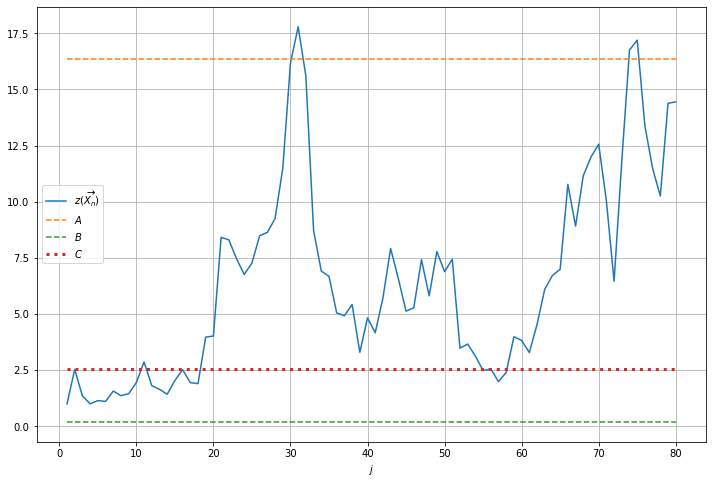

In [13]:
plt.figure(figsize=(12, 8))

plt.plot(xlist, ylist, label=r'$z(\overrightarrow{Х_n})$')
plt.plot(xlist, [A for i in xlist], linestyle='--', label=r'$A$')
plt.plot(xlist, [B for i in xlist], linestyle='--', label=r'$B$')
plt.plot(xlist, [c_pirson for i in xlist], linestyle=':', label=r'$C$', linewidth=3)

plt.xlabel(r'$j$')
plt.legend()
plt.grid()
plt.show()

Получили значение $C \in [B; A]$, что говорит о правильности найденного решения. Также сравнивая результаты с обычным критерием из 5 задания, можно увидеть их эквивалентность

**Вывод**: в ходе 5 и 6 работ мы использовали 3 основных критерия: обычный критерий, последовательный критерий Вальда и критерий Неймана-Пирсона. Все они дали один результат: отвержение основной гипотезы в пользу альтернативной. 
Исходя их этого можно смело утверждать о правильности найденных результатов и о верном использовании вышеперечисленных критериев